In [1]:
import pandas as pd
import numpy as np

er = pd.read_csv("data/edhec-hedgefundindices.csv", header=0,
                index_col=0, parse_dates=True).to_period('M')
er = er/100
er.columns

Index(['Convertible Arbitrage', 'CTA Global', 'Distressed Securities',
       'Emerging Markets', 'Equity Market Neutral', 'Event Driven',
       'Fixed Income Arbitrage', 'Global Macro', 'Long/Short Equity',
       'Merger Arbitrage', 'Relative Value', 'Short Selling',
       'Funds Of Funds'],
      dtype='object')

In [2]:
er1 = er["2000":]["Distressed Securities"]
er1

date
2000-01    0.0088
2000-02    0.0421
2000-03    0.0103
2000-04   -0.0101
2000-05   -0.0132
            ...  
2018-07    0.0093
2018-08    0.0002
2018-09    0.0050
2018-10   -0.0158
2018-11   -0.0193
Freq: M, Name: Distressed Securities, Length: 227, dtype: float64

In [3]:
import edhec_risk_kit as erk

## Q.1
Use the EDHEC Hedge Fund Indices data set that we used in the lab assignment as well as in the previous week’s assignments. Load them into Python and perform the following analysis based on data since 2000 (including all of 2000): What was the Monthly Parametric Gaussian VaR at the 1% level (as a +ve number) of the Distressed Securities strategy?

In [4]:
erk.var_gaussian(er1, level=1)

0.03143017693928047

## Q.2
Use the same data set at the previous question. What was the 1% VaR for the same strategy after applying the Cornish-Fisher Adjustment?

In [5]:
erk.var_gaussian(er1, level=1, modified=True)

0.04966909110627918

## Q.3
Use the same dataset as the previous question. What was the Monthly Historic VaR at the 1% level (as a +ve number) of the Distressed Securities strategy?

In [6]:
erk.var_historic(er1, level=1)

0.042642

## Q.4
Next, load the 30 industry return data using the erk.get_ind_returns() function that we developed during the lab sessions. For purposes of the remaining questions, use data during the 5 year period 2013-2017 (both inclusive) to estimate the expected returns as well as the covariance matrix. To be able to respond to the questions, you will need to build the MSR, EW and GMV portfolios consisting of the “Books”, “Steel”, "Oil", and "Mines" industries. Assume the risk free rate over the 5 year period is 10%.

What is the weight of Steel in the EW Portfolio? 

In [7]:
ind = erk.get_ind_returns()
ind
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [8]:
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [9]:
l = ["Books", "Steel", "Oil", "Mines"]
er = erk.annualize_rets(ind["2013":"2017"], 12)
cov = ind["2013":"2017"].cov()

## Q.5
What is the weight of the largest component of the MSR portfolio? 

## Q.6
Which of the 4 components has the largest weight in the MSR portfolio?

## Q.7
How many of the components of the MSR portfolio have non-zero weights?  

<AxesSubplot:xlabel='Volatility'>

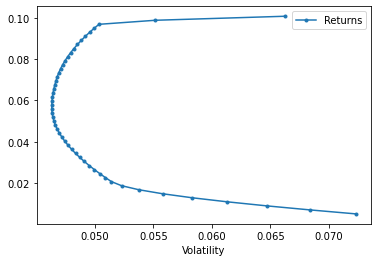

In [10]:
erk.plot_ef(50, er[l], cov.loc[l,l], riskfree_rate=0.1)

In [11]:
er[l]

Books    0.095312
Steel    0.100716
Oil      0.025275
Mines    0.005136
dtype: float64

In [12]:
weights_msr=erk.msr(0.1,er[l],cov.loc[l,l])

covmat = cov.loc[l,l] 

erk.portfolio_vol(weights_msr,covmat)

0.0662652335966289

In [13]:
weights_msr

array([4.51375048e-15, 1.00000000e+00, 1.40512602e-16, 0.00000000e+00])

## Q.8
What is the weight of the largest component of the GMV portfolio?

## Q.9
Which of the 4 components has the largest weight in the GMV portfolio?   

## Q.10
How many of the components of the GMV portfolio have non-zero weights? 

In [15]:
erk.gmv(cov.loc[l,l])

array([4.77024870e-01, 4.33680869e-19, 4.34112024e-01, 8.88631053e-02])

## Q.11
Assume two different investors invested in the GMV and MSR portfolios at the start of 2018 using the weights we just computed. Compute the annualized volatility of these two portfolios over the next 12 months of 2018? (Hint: Use the portfolio_vol code we developed in the lab and use ind[“2018”][l].cov() to compute the covariance matrix for 2018, assuming that the variable ind holds the industry returns and the variable l holds the list of industry portfolios you are willing to hold. Don’t forget to annualize the volatility)

What would be the annualized volatility over 2018 using the weights of the MSR portfolio?

In [20]:
ind["2018":]

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-01,0.0238,-0.0011,0.0013,0.1726,0.0449,-0.0198,0.0729,0.0638,0.0170,0.0160,...,0.0318,0.0925,0.0501,0.0438,0.0268,0.0483,0.1156,0.0323,0.0611,0.0551
2018-02,-0.0675,-0.0676,-0.0662,0.0109,-0.0325,-0.0625,-0.0195,-0.0390,-0.0512,-0.1235,...,-0.0732,-0.0169,0.0205,-0.0528,-0.0665,-0.0556,-0.0472,-0.0419,-0.0255,-0.0444
2018-03,-0.0187,0.0127,-0.0165,-0.0017,0.0031,0.0210,0.0064,-0.0200,-0.0186,-0.0214,...,-0.0252,-0.0331,-0.0292,-0.0435,0.0053,-0.0104,-0.0325,-0.0054,-0.0338,-0.0340
2018-04,-0.0167,-0.0429,-0.1416,0.0331,-0.0062,-0.0531,0.0316,-0.0028,0.0071,-0.0954,...,-0.0241,0.0118,-0.0195,-0.0609,0.0050,0.0083,0.0429,0.0350,0.0118,-0.0190
2018-05,-0.0078,-0.0119,-0.0187,0.0902,-0.0061,-0.0024,0.0421,0.0243,0.0242,-0.0136,...,-0.0093,0.0586,0.0784,0.0079,0.0486,0.0169,0.0136,-0.0195,0.0040,-0.0038
2018-06,0.0540,0.0442,0.0307,0.0496,0.0218,0.0362,0.0698,0.0152,0.0033,0.0336,...,0.0623,0.0107,-0.0190,-0.0044,-0.0365,0.0023,0.0436,-0.0289,-0.0098,-0.0204
2018-07,0.0221,0.0350,0.0524,-0.0612,-0.0417,0.0232,0.0035,0.0612,0.0485,-0.0889,...,0.0268,0.0203,0.0277,0.0595,0.0791,0.0239,0.0355,0.0116,0.0426,0.0604
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599


In [26]:
ind["2018":]["Steel"].std()*np.sqrt(12)

0.21983988181484185

## Q.12

What would be the annualized volatility over 2018 using the weights of the GMV portfolio? (Reminder and Hint: Use the portfolio_vol code we developed in the lab and use ind[“2018”][l].cov() to compute the covariance matrix for 2018, assuming that the variable ind holds the industry returns and the variable l holds the list of industry portfolios you are willing to hold. Don’t forget to annualize the volatility) 

In [30]:
ind_l = ind["2018":][l]

In [31]:
ind_l.cov()

,Books,Steel,Oil,Mines
Books,0.002799,0.002098,0.002558,0.001629
Steel,0.002098,0.004027,0.003473,0.001843
Oil,0.002558,0.003473,0.005296,0.001961
Mines,0.001629,0.001843,0.001961,0.002059


In [33]:
gmv_l = erk.gmv(cov.loc[l,l])

In [34]:
gmv_l

array([4.77024870e-01, 4.33680869e-19, 4.34112024e-01, 8.88631053e-02])

In [37]:
gmv_l.T @ ind_l.cov() @ gmv_l

0.003000021677618707

In [41]:
erk.portfolio_vol(gmv_l, ind_l.cov()) * np.sqrt(12)

0.18973734511535803

In [42]:
(gmv_l.T @ ind_l.cov() @ gmv_l) ** 0.5 * np.sqrt(12)

0.18973734511535803